#### Jupyter Notebook to scrape kml files from the Forest clearance portal, Ministry of Environment and Forests, India.  
##### This notebook downloads all the files in a single folder. 

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt

df = pd.read_excel(os. getcwd() + '/RecordsUpto2014.xlsx', index_col=0)
df['year'] = pd.DatetimeIndex(df['DATE_FROM_UA_TO_NODAL']).year

In [15]:
df2 = df.groupby('year')['AREA_APPLIED'].sum()

[Text(0, 0.5, 'Forest area diverted(in ha)'), Text(0.5, 0, 'Year')]

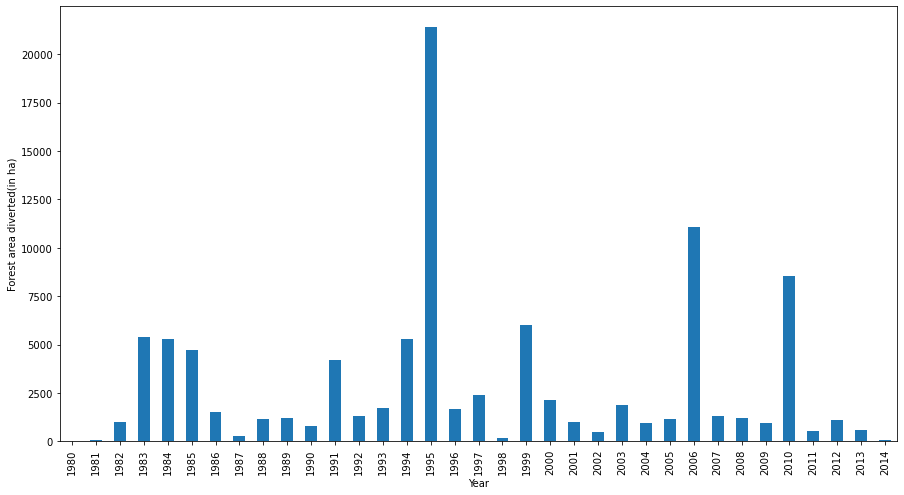

In [16]:
plt.rcParams["figure.figsize"] = [15, 8]
df2.plot.bar(x='year', y='area', rot=90).set(ylabel ="Forest area diverted(in ha)", xlabel = "Year")

In [32]:
import pandas as pd
import os
from itertools import cycle, islice
import matplotlib.pyplot as plt

df = pd.read_excel(os. getcwd() + '/RecordsUpto2014.xlsx', index_col=0)
df['year'] = pd.DatetimeIndex(df['DATE_FROM_UA_TO_NODAL']).year
#df['AREA_APPLIED'] = df['AREA_APPLIED'] * 0.01
#stacked bar based on category
#change categories
df.loc[df['CATEGORY'] == 'DISPENSARY/HOSPITAL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'SCHOOL', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'ENCROACHMENTS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'REHABILITATION', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'OTHERS', 'SUMMARY_CAT'] = 'Others' 
df.loc[df['CATEGORY'] == 'HYDEL', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'TRANSMISSION LINE', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'VILLAGE ELECTRICITY', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'WIND POWER', 'SUMMARY_CAT'] = 'Electricity' 
df.loc[df['CATEGORY'] == 'IRRIGATION', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'DRINKING WATER', 'SUMMARY_CAT'] = 'Water' 
df.loc[df['CATEGORY'] == 'QUARRYING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'MINING', 'SUMMARY_CAT'] = 'Resource Extraction' 
df.loc[df['CATEGORY'] == 'ROAD', 'SUMMARY_CAT'] = 'Linear Infrastructure' 
df.loc[df['CATEGORY'] == 'Railway', 'SUMMARY_CAT'] = 'Linear Infrastructure' 

#df = df[df.year != 1995]
#df = df[df.year != 2006]
#df = df[df.year != 2010]

#transpose data for stacked bar
df1 = df.groupby(['year','SUMMARY_CAT'])['AREA_APPLIED'].sum().unstack().fillna(0) 
df1
#df1['AREA_APPLIED'] = df1['AREA_APPLIED'] * 0.01

SUMMARY_CAT,Electricity,Linear Infrastructure,Others,Resource Extraction,Water
year,,,,,
1980,0.0000,0.0000,0.8000,0.00000,0.0000
1981,0.0000,0.0000,46.7000,0.00000,0.0000
1982,87.7100,0.0000,687.1110,10.00000,224.0828
1983,273.6200,31.2100,3404.8507,1217.02400,479.1511
1984,594.6996,1.0650,2333.3506,4.00000,2331.1700
1985,4452.5900,6.4200,35.7976,225.40800,10.9685
1986,1407.2600,0.0000,1.3400,82.95000,0.0000
1987,97.5493,8.0000,20.8500,141.00000,3.9650
1988,1.9900,0.1600,789.8864,110.74200,229.4649


Text(0.5, 0, 'Year')

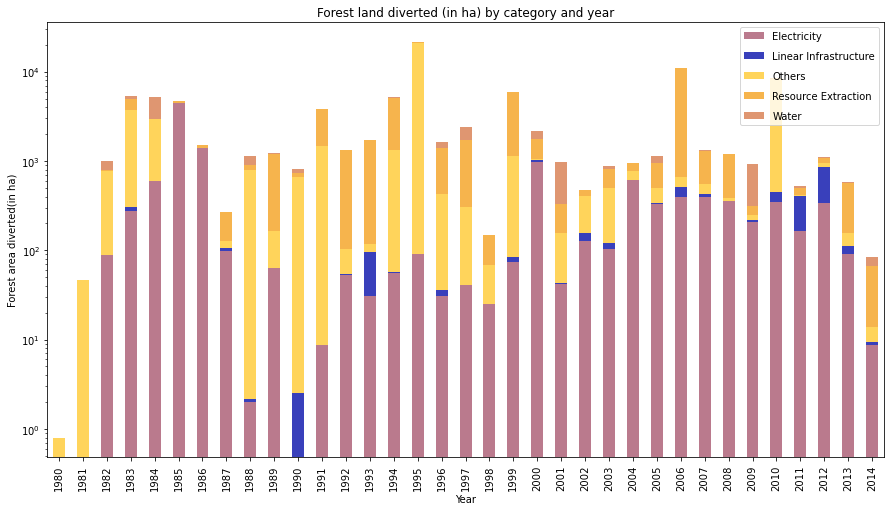

In [33]:
my_colors = list(islice(cycle(['#ba7a8d', '#3940bb', '#ffd45b', '#f6b44d', '#df9671']), None, len(df)))

plt.rcParams["figure.figsize"] = [15, 8]
df1.plot.bar(stacked = True, color=my_colors, log=True)
plt.legend(frameon=True,labelspacing=1, title='')
plt.title('Forest land diverted (in ha) by category and year')
plt.ylabel("Forest area diverted(in ha)")
plt.xlabel("Year")